In [1]:
from landscape_evolution import * 

In [2]:
from GLCM_functions import *

In [3]:
N = 5                                    #Landscape size is 2^N
sigma = 1.0                              #Epistasis
correl = np.linspace(-1.0,1.0,51)        #Define what correlations you'd like to make in the B landscape.
saveBs = np.zeros((51,2**N))

phenom = 0

A = Landscape(N, sigma)                                                      #Generate A Landscapes.
Bs = A.generate_correlated_landscapes(correl, without_shared_max=False)      #Generate B landscapes. Note the flag here. This doesn't tamper, however if you set to True you'll only generate landscapes with no shared maxima.

for k in range(len(correl)):
    saveBs[k,:] = Bs[k].ls

saveA = np.asarray(A.ls)
print(saveBs)

#np.savetxt("BsForSteph.csv", saveBs, delimiter=",")
#np.savetxt("AForSteph.csv",saveA,delimiter=",")


[[ 0.02644078  1.66316038 -1.41063513 ...  1.75987181 -3.18290743
  -1.99667545]
 [-0.0585506   1.79233507 -1.31547378 ...  1.61382509 -2.25190177
  -1.7612682 ]
 [-0.09406744  1.74722409 -1.22874214 ...  1.47915259 -1.82469579
  -1.6040392 ]
 ...
 [-0.1348804  -0.8199651   0.94865897 ... -1.23731656  3.08831539
   1.47795078]
 [-0.10408423 -1.07179081  1.11377877 ... -1.41684739  3.22937813
   1.67720347]
 [-0.02644078 -1.66316038  1.41063513 ... -1.75987181  3.18290743
   1.99667545]]


In [4]:
# *** IMPORTED PACKAGES ***b
import numpy as np
import itertools
import os # new
from time import time
import matplotlib.pyplot as plt
import random
import decimal


start = time()  # starts the clock used to measure the execution speed

# *** MODEL INPUTS ****************************************************

# NK landscape parameters -----------------------------------------
N = 16  # number of detailed decisions per lower level landscape   |
i = 100  # we will generate 1000 NK landscapes to begin with     |
# -----------------------------------------------------------------

# You can change the following variables:
which_imatrix = 1  # defines the type of an interaction matrix
                   # choose 1 for random, 2 for modular, 3 for nearly modular,
                   # 4 for diagonal, 5 for highly influential, and
                   # 6 for highly dependent, 7 local (see below)
K = 5  # only has an effect when you choose the random interaction matrix (1)
       # set to 2 for other interaction matrices


# *** GENERATING INTERACTION MATRICES ***************************************

def imatrix_rand(N=16,K=4):
    '''
    This function takes the number of N elements and K interdependencies
    and creates a random interaction matrix.
    '''
    Int_matrix_rand = np.zeros((N, N))
    for aa1 in np.arange(N):
        Indexes_1 = list(range(N))
        Indexes_1.remove(aa1)  # remove diagonal (self)
        np.random.shuffle(Indexes_1) #randomise order
        Indexes_1.append(aa1) #add self to end
        Chosen_ones = Indexes_1[-(K+1):]  # this takes the last K+1 indexes inc self
        for aa2 in Chosen_ones: #for index in random list
            Int_matrix_rand[aa1, aa2] = 1  # we turn on the interactions with K other variables
    return(Int_matrix_rand)


In [5]:
def calc_fit(NK_land_, inter_m, Current_position, Power_key_):
    '''
    Takes the landscape and a given combination and returns a vector of fitness
    values for the vector of the N decision variables.
    '''
    Fit_vector = np.zeros(N)
    for ad1 in np.arange(N):
        Fit_vector[ad1] = NK_land_[np.sum(Current_position * inter_m[ad1]
                                          * Power_key_), ad1]
    return(Fit_vector)

In [6]:
class Solution(object):
   def hammingDistance(self, x, y):
      """
      :type x: int
      :type y: int
      :rtype: int
      """
      ans = 0
      for i in range(31,-1,-1):
         b1= x>>i&1
         b2 = y>>i&1
         ans+= not(b1==b2)
         #if not(b1==b2):
            # print(b1,b2,i)
      return ans

In [7]:
pd_B = pd.read_csv('BsForSteph.csv', header=None)  
pd_A = pd.read_csv('AForSteph.csv', header=None)

In [8]:
f=open("AForSteph.csv", "r")
if f.mode == 'r':
    contents =f.read()
    print (contents)

with open('AForSteph.csv') as f:
    lines = f.read().splitlines()
    
with open('BsForSteph.csv') as f:
    linesb = f.read().splitlines()
    
    #or, readlines reads the individual line into a list
    #fl =f.readlines()
    #for x in fl:
    #print(x)
pd_B = pd.read_csv('BsForSteph.csv', header=None)  
pd_A = pd.read_csv('AForSteph.csv', header=None)
print(lines)
print(linesb)

glcm_landscape_simple(lines)

2.145959001086611639e+00
1.724015942645984456e+00
1.539447201611234828e+00
-1.926489057538286476e-01
-4.750638816438088607e-01
-2.374861933738657616e+00
6.318282718718910562e-01
-2.024451651756663306e+00
9.775910972303117341e-02
3.736612210250227495e-01
-1.403879056996945041e-01
5.450089221662163252e-01
1.314034465191780687e-01
-2.598332572484500780e-01
1.332680753514911887e+00
-7.754523901073295811e-01
-6.960953085817354058e-01
-2.022479894936141331e+00
-6.232247411976502560e-01
-1.501046021357779647e+00
-4.148100225639188565e-01
-6.817529916516504862e-01
-8.601280765833021480e-01
-1.327044117978772642e+00
1.396908771204649069e-01
-3.054424635946095812e-02
-8.942950838457335294e-01
2.797342501501343115e-02
-1.308851523780635073e+00
-2.203786177090706122e+00
-4.135723500252944662e-01
-2.319500057314440866e+00

['2.145959001086611639e+00', '1.724015942645984456e+00', '1.539447201611234828e+00', '-1.926489057538286476e-01', '-4.750638816438088607e-01', '-2.374861933738657616e+00', '6.318

{'TM': array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.33333333],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'TM_diff': 30.533333333333335,
 'energy': 0.044375,
 'correlation': 0.32802660621352453,
 'entropy': 3.5257758503046883,
 'contrast': 60.462500000000006,
 'homogeneity': 0.3508400361893009,
 'glcm': array([[0.0875, 0.    , 0.    , 0.    , 0.    , 0.    , 0.0125, 0.025 ,
         0.    , 0.    , 0.0125, 0.0125, 0.    , 0.    , 0.0125, 0.0125,
         0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0

In [9]:
print(pd_B.apply(glcm_landscape_simple, axis=1))
x = pd_B.apply(glcm_landscape_simple, axis=1)
print(pd_A.apply(glcm_landscape_simple))
y = pd.DataFrame(x.tolist())

[ 0  1  2  8  9 16  5 14  7  6  8  5  7  8  2 10 10 14  9 12  9 10 10 12
  7  7 10  7 12 15  9 15]
[ 0  2  0  6  7 15  7 15  7  4  8  5  6 10  1  9  9 15  9 11 10 11  9 12
  8  8  9  6 10 13  8 16]
[ 0  2  0  6  6 14  7 16  7  4  8  5  5 10  0  9  9 15  8 10 11 12  8 12
  9  8  8  5  9 12  8 15]
[ 0  2  0  5  5 13  8 16  7  3  7  5  5 11  0  9  9 15  8 10 11 12  8 12
  9  8  7  5  9 11  8 15]
[ 0  2  0  5  5 13  8 16  8  3  7  6  5 11  0  9  9 15  8  9 11 13  7 12
 10  8  6  4  8 10  8 15]
[ 0  3  0  5  5 12  9 16  8  3  8  6  4 12  0  8  8 15  7  9 12 13  7 12
 10  8  6  4  8 10  8 14]
[ 1  3  0  4  4 12  9 16  8  3  8  6  4 12  0  8  8 15  7  8 12 13  7 12
 11  8  6  4  7  9  8 14]
[ 1  3  0  4  4 12 10 16  8  3  8  6  4 12  0  8  8 14  7  8 12 14  7 12
 11  8  5  4  7  9  7 14]
[ 1  4  0  4  4 11 10 16  8  3  8  6  4 13  0  8  8 14  7  8 13 14  6 12
 11  8  5  4  7  8  7 14]
[ 1  4  0  4  3 11 11 16  8  2  8  6  4 13  0  8  8 14  7  7 13 14  6 12
 12  8  5  4  6  8  7 14]
[ 2  5  0 

[ 1  4  0  4  3 11 11 16  8  2  8  6  4 13  0  8  8 14  7  7 13 14  6 12
 12  8  5  4  6  8  7 14]
[ 2  5  0  4  3 11 11 16  9  2  8  6  4 13  0  8  8 14  7  7 13 15  6 12
 12  8  4  3  6  7  7 13]
[ 2  5  0  3  3 10 11 16  9  2  8  7  4 14  0  8  8 14  7  7 13 15  6 12
 13  9  4  3  6  7  7 13]
[ 2  5  0  3  3 10 12 16  9  2  8  7  4 14  0  8  8 14  7  6 14 15  6 12
 13  9  4  3  6  6  7 13]
[ 3  6  0  3  2 10 12 16  9  2  8  7  4 14  0  8  8 14  6  6 14 15  5 12
 13  9  4  3  5  6  7 13]
[ 3  6  0  3  2  9 13 15  9  2  8  7  4 14  0  8  8 14  6  6 14 16  5 12
 13  9  3  3  5  5  7 13]
[ 3  6  0  3  2  9 13 15  9  2  8  7  4 15  0  7  8 14  6  5 14 16  5 12
 14  9  3  3  5  5  7 12]
[ 4  6  0  2  1  8 13 15  9  2  8  7  3 15  0  7  7 13  6  5 14 16  4 12
 14  9  3  3  4  4  7 12]
[ 4  7  0  2  1  8 13 15  9  2  8  7  3 15  0  7  7 13  6  5 14 16  4 11
 14  9  2  2  4  4  7 12]
[ 4  7  0  2  1  7 13 14  9  1  8  7  3 15  0  7  7 13  5  4 14 16  4 11
 14  9  2  2  3  3  7 11]
[ 4  7  0 

In [10]:
np.sum(abs(y.TM[0]-y.TM[3]))

31.099999999999998

In [11]:
def fitness_s(state_vec, dict_1, dict_2, dict_3):
    fitness = 0
    fitness = fitness+dict_1[str(state_vec[0])+str(state_vec[2])]
    fitness = fitness+dict_2[str(state_vec[0])+str(state_vec[1])]
    fitness = fitness+dict_3[str(state_vec[2])+str(state_vec[1])]
    fitness = fitness/len(state_vec)
    return(fitness)

<AxesSubplot:>

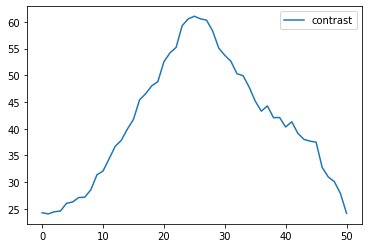

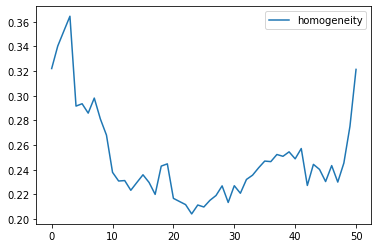

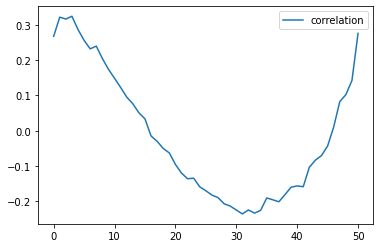

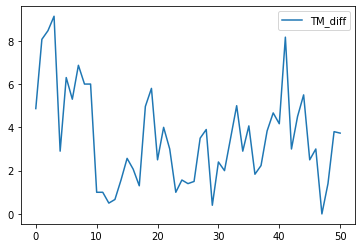

In [12]:
%matplotlib inline

#fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
#y.plot(y="energy")
#y.plot(y="entropy")
y.plot(y="contrast")
y.plot(y="homogeneity")
y.plot(y="correlation")
y.plot(y="TM_diff")
#y


GLCM features calculated between landscapes 

In [13]:
pd_B.loc[0]

0    -2.145959
1    -1.724016
2    -1.539447
3     0.192649
4     0.475064
5     2.374862
6    -0.631828
7     2.024452
8    -0.097759
9    -0.373661
10    0.140388
11   -0.545009
12   -0.131403
13    0.259833
14   -1.332681
15    0.775452
16    0.696095
17    2.022480
18    0.623225
19    1.501046
20    0.414810
21    0.681753
22    0.860128
23    1.327044
24   -0.139691
25    0.030544
26    0.894295
27   -0.027973
28    1.308852
29    2.203786
30    0.413572
31    2.319500
Name: 0, dtype: float64

In [14]:
from GLCM_functions import glcm_landscape_between
glcm_landscape_between(pd_B.loc[48], pd_B.loc[49])

7 7
7 7
7 7
6 7
5 5
0 0
7 7
4 3
7 7
7 7
7 7
7 7
7 7
7 7
7 7
6 6
6 6
3 2
6 6
2 2
7 7
7 7
5 5
5 5
7 7
7 7
4 4
7 7
3 3
0 0
7 7
2 1
5.5 5.4375


{'energy': 0.310546875,
 'correlation': 0.9893664888546532,
 'entropy': 1.7112797008596077,
 'contrast': 0.125,
 'homogeneity': 0.9375}

In [15]:
pd_A

,0
0,2.145959
1,1.724016
2,1.539447
3,-0.192649
4,-0.475064
5,-2.374862
6,0.631828
7,-2.024452
8,0.097759
9,0.373661


In [16]:
print(len(pd_A[0]))
import pandas
df_diff_lscp = pd_B.apply(glcm_landscape_between, lscp2=pd_A[0], axis=1)
pd_B
pd.DataFrame(df_diff_lscp.tolist())
pd_BT = pd_B.T
pd_BT.corr("pearson")

32
0 7
1 7
2 7
7 7
7 6
7 0
5 7
7 1
7 7
6 7
7 7
5 7
7 7
7 7
2 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
7 5
7 7
7 3
7 0
7 6
7 0
6.125 5.15625
0 7
2 7
0 7
6 7
7 6
7 0
7 7
7 1
7 7
4 7
7 7
5 7
6 7
7 7
1 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
7 5
6 7
7 3
7 0
7 6
7 0
5.96875 5.15625
0 7
2 7
0 7
6 7
6 6
7 0
7 7
7 1
7 7
4 7
7 7
5 7
5 7
7 7
0 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
7 5
5 7
7 3
7 0
7 6
7 0
5.84375 5.15625
0 7
2 7
0 7
5 7
5 6
7 0
7 7
7 1
7 7
3 7
7 7
5 7
5 7
7 7
0 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
7 5
5 7
7 3
7 0
7 6
7 0
5.75 5.15625
0 7
2 7
0 7
5 7
5 6
7 0
7 7
7 1
7 7
3 7
7 7
6 7
5 7
7 7
0 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
6 5
4 7
7 3
7 0
7 6
7 0
5.71875 5.15625
0 7
3 7
0 7
5 7
5 6
7 0
7 7
7 1
7 7
3 7
7 7
6 7
4 7
7 7
0 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
6 5
4 7
7 3
7 0
7 6
7 0
5.71875 5.15625
1 7
3 7
0 7
4 7
4 6
7 0
7 7
7 1
7 7
3 7
7 7
6 7
4 7
7 7
0 7
7 5
7 5
7 1
7 6
7 3
7 6
7 5
7 5
7 3
7 7
7 7
6 5
4 7
7 3
7 0
7 6
7 0
5.6875 5.1

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,1.000000e+00,9.600000e-01,0.920000,0.880000,0.840000,8.000000e-01,0.760000,0.720000,0.680000,0.640000,...,-0.640000,-0.680000,-0.720000,-0.760000,-8.000000e-01,-0.840000,-0.880000,-0.920000,-9.600000e-01,-1.000000e+00
1,9.600000e-01,1.000000e+00,0.992937,0.977793,0.958324,9.360000e-01,0.911578,0.885513,0.858099,0.829545,...,-0.399255,-0.447501,-0.496887,-0.547622,-6.000000e-01,-0.654476,-0.711807,-0.773463,-8.432000e-01,-9.600000e-01
2,9.200000e-01,9.929371e-01,1.000000,0.995751,0.985450,9.711510e-01,0.953917,0.934381,0.912959,0.889940,...,-0.287660,-0.338241,-0.390419,-0.444483,-5.008490e-01,-0.560150,-0.623449,-0.692800,-7.734629e-01,-9.200000e-01
3,8.800000e-01,9.777926e-01,0.995751,1.000000,0.996914,9.889842e-01,0.977496,0.963219,0.946656,0.928158,...,-0.198242,-0.250144,-0.303981,-0.360104,-4.190158e-01,-0.481486,-0.548800,-0.623449,-7.118074e-01,-8.800000e-01
4,8.400000e-01,9.583242e-01,0.985450,0.996914,1.000000,9.975518e-01,0.991039,0.981341,0.969031,0.954510,...,-0.120690,-0.173369,-0.228259,-0.285761,-3.464482e-01,-0.411200,-0.481486,-0.560150,-6.544758e-01,-8.400000e-01
5,8.000000e-01,9.360000e-01,0.971151,0.988984,0.997552,1.000000e+00,0.997954,0.992384,0.983927,0.973025,...,-0.050975,-0.104073,-0.159616,-0.218046,-2.800000e-01,-0.346448,-0.419016,-0.500849,-6.000000e-01,-8.000000e-01
6,7.600000e-01,9.115785e-01,0.953917,0.977496,0.991039,9.979538e-01,1.000000,0.998230,0.993331,0.985785,...,0.012985,-0.040269,-0.096170,-0.155200,-2.180462e-01,-0.285761,-0.360104,-0.444483,-5.476215e-01,-7.600000e-01
7,7.200000e-01,8.855127e-01,0.934381,0.963219,0.981341,9.923844e-01,0.998230,1.000000,0.998430,0.994032,...,0.072432,0.019230,-0.036800,-0.096170,-1.596156e-01,-0.228259,-0.303981,-0.390419,-4.968873e-01,-7.200000e-01
8,6.800000e-01,8.580994e-01,0.912959,0.946656,0.969031,9.839273e-01,0.993331,0.998430,1.000000,0.998582,...,0.128182,0.075200,0.019230,-0.040269,-1.040727e-01,-0.173369,-0.250144,-0.338241,-4.475006e-01,-6.800000e-01
9,6.400000e-01,8.295450e-01,0.889940,0.928158,0.954510,9.730249e-01,0.985785,0.994032,0.998582,1.000000,...,0.180800,0.128182,0.072432,0.012985,-5.097505e-02,-0.120690,-0.198242,-0.287660,-3.992550e-01,-6.400000e-01


<AxesSubplot:>

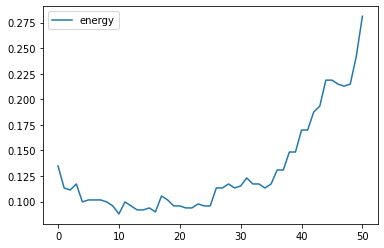

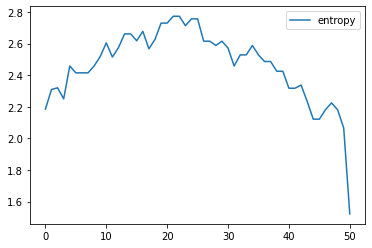

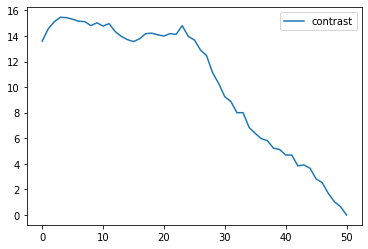

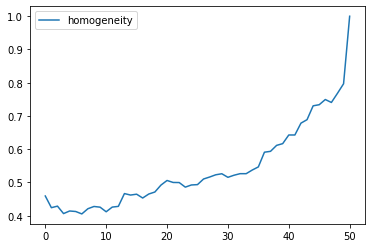

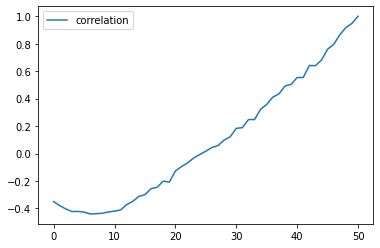

In [17]:
z = pd.DataFrame(df_diff_lscp.tolist())
z.plot(y="energy")
z.plot(y="entropy")
z.plot(y="contrast")
z.plot(y="homogeneity")
z.plot(y="correlation")